ดาวโหลด packages และ dependies สำหรับโปรเจ็ค

In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


สร้าง folder เปล่าเพื่อเตรียมดาวโหลด dataset ที่อัพโหลดขึ้น Roboflow

In [ ]:
import os

HOME = os.getcwd()
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


ดาวโหลด dataset จาก Roboflow

1. ไปที่หน้าโปรเจ็คของเราบน roboflow และกดปุ่ม download dataset ตรงมุมขวาบนของ website

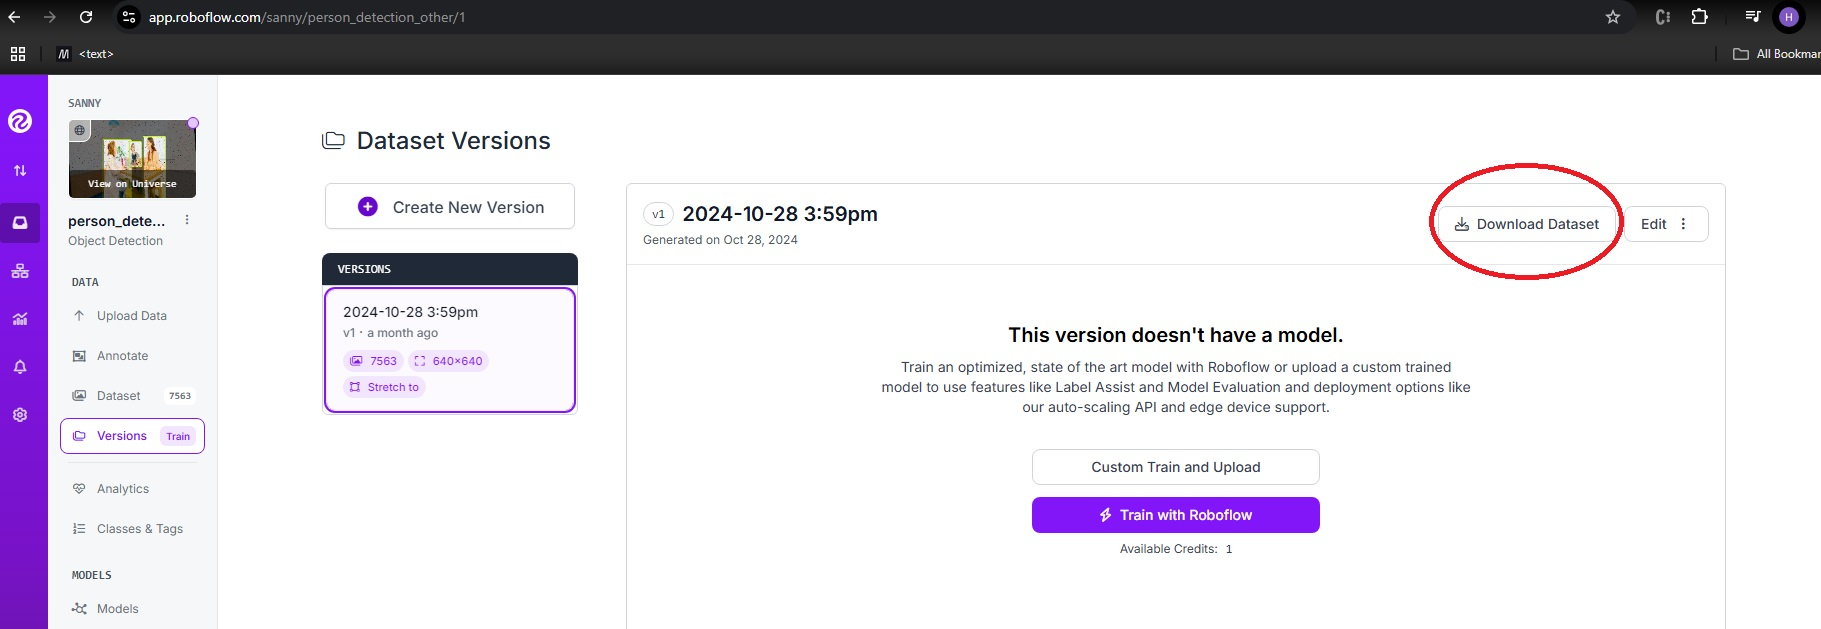


2. เลือก format dataset ของเราให้ตรงกับเวอร์ชั่น yolo ที่เราจะใช้ฝึก

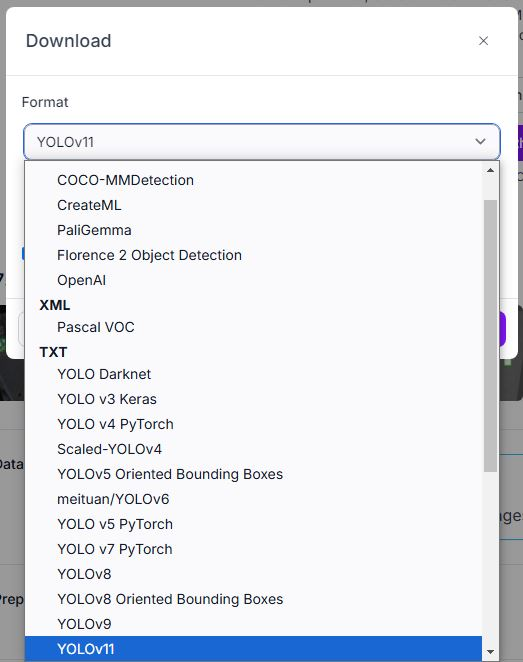

3. คลิกปุ่ม copy และนำมาวางบน cell ด้านล้างของเรา

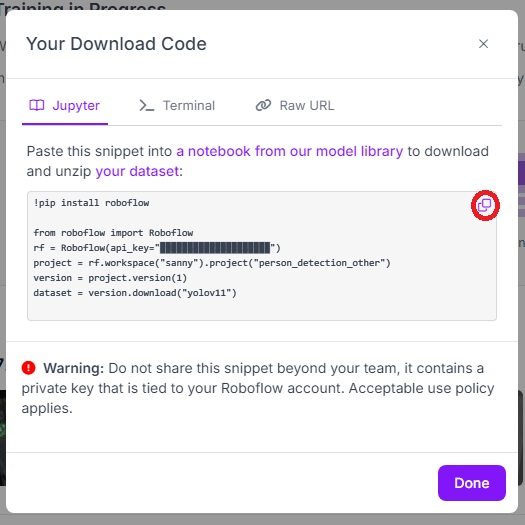

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="h9HEY6ef0VXN3hSA8y2B")
project = rf.workspace("sanny").project("person_detection_other")
version = project.version(1)
dataset = version.download("yolov11")




'''
from roboflow import Roboflow
rf = Roboflow(api_key="h9HEY6ef0VXN3hSA8y2B")
project = rf.workspace("sanny").project("person_detection_other")
version = project.version(1)
dataset = version.download("yolov8")
'''

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to person_detection_other-1 in yolov11:: 100%|██████████| 15138/15138 [00:04<00:00, 3119.45it/s]


'\nfrom roboflow import Roboflow\nrf = Roboflow(api_key="h9HEY6ef0VXN3hSA8y2B")\nproject = rf.workspace("sanny").project("person_detection_other")\nversion = project.version(1)\ndataset = version.download("yolov8")\n'

เริ่มการฝึก model

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 192MB/s]
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/person_detection_other-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

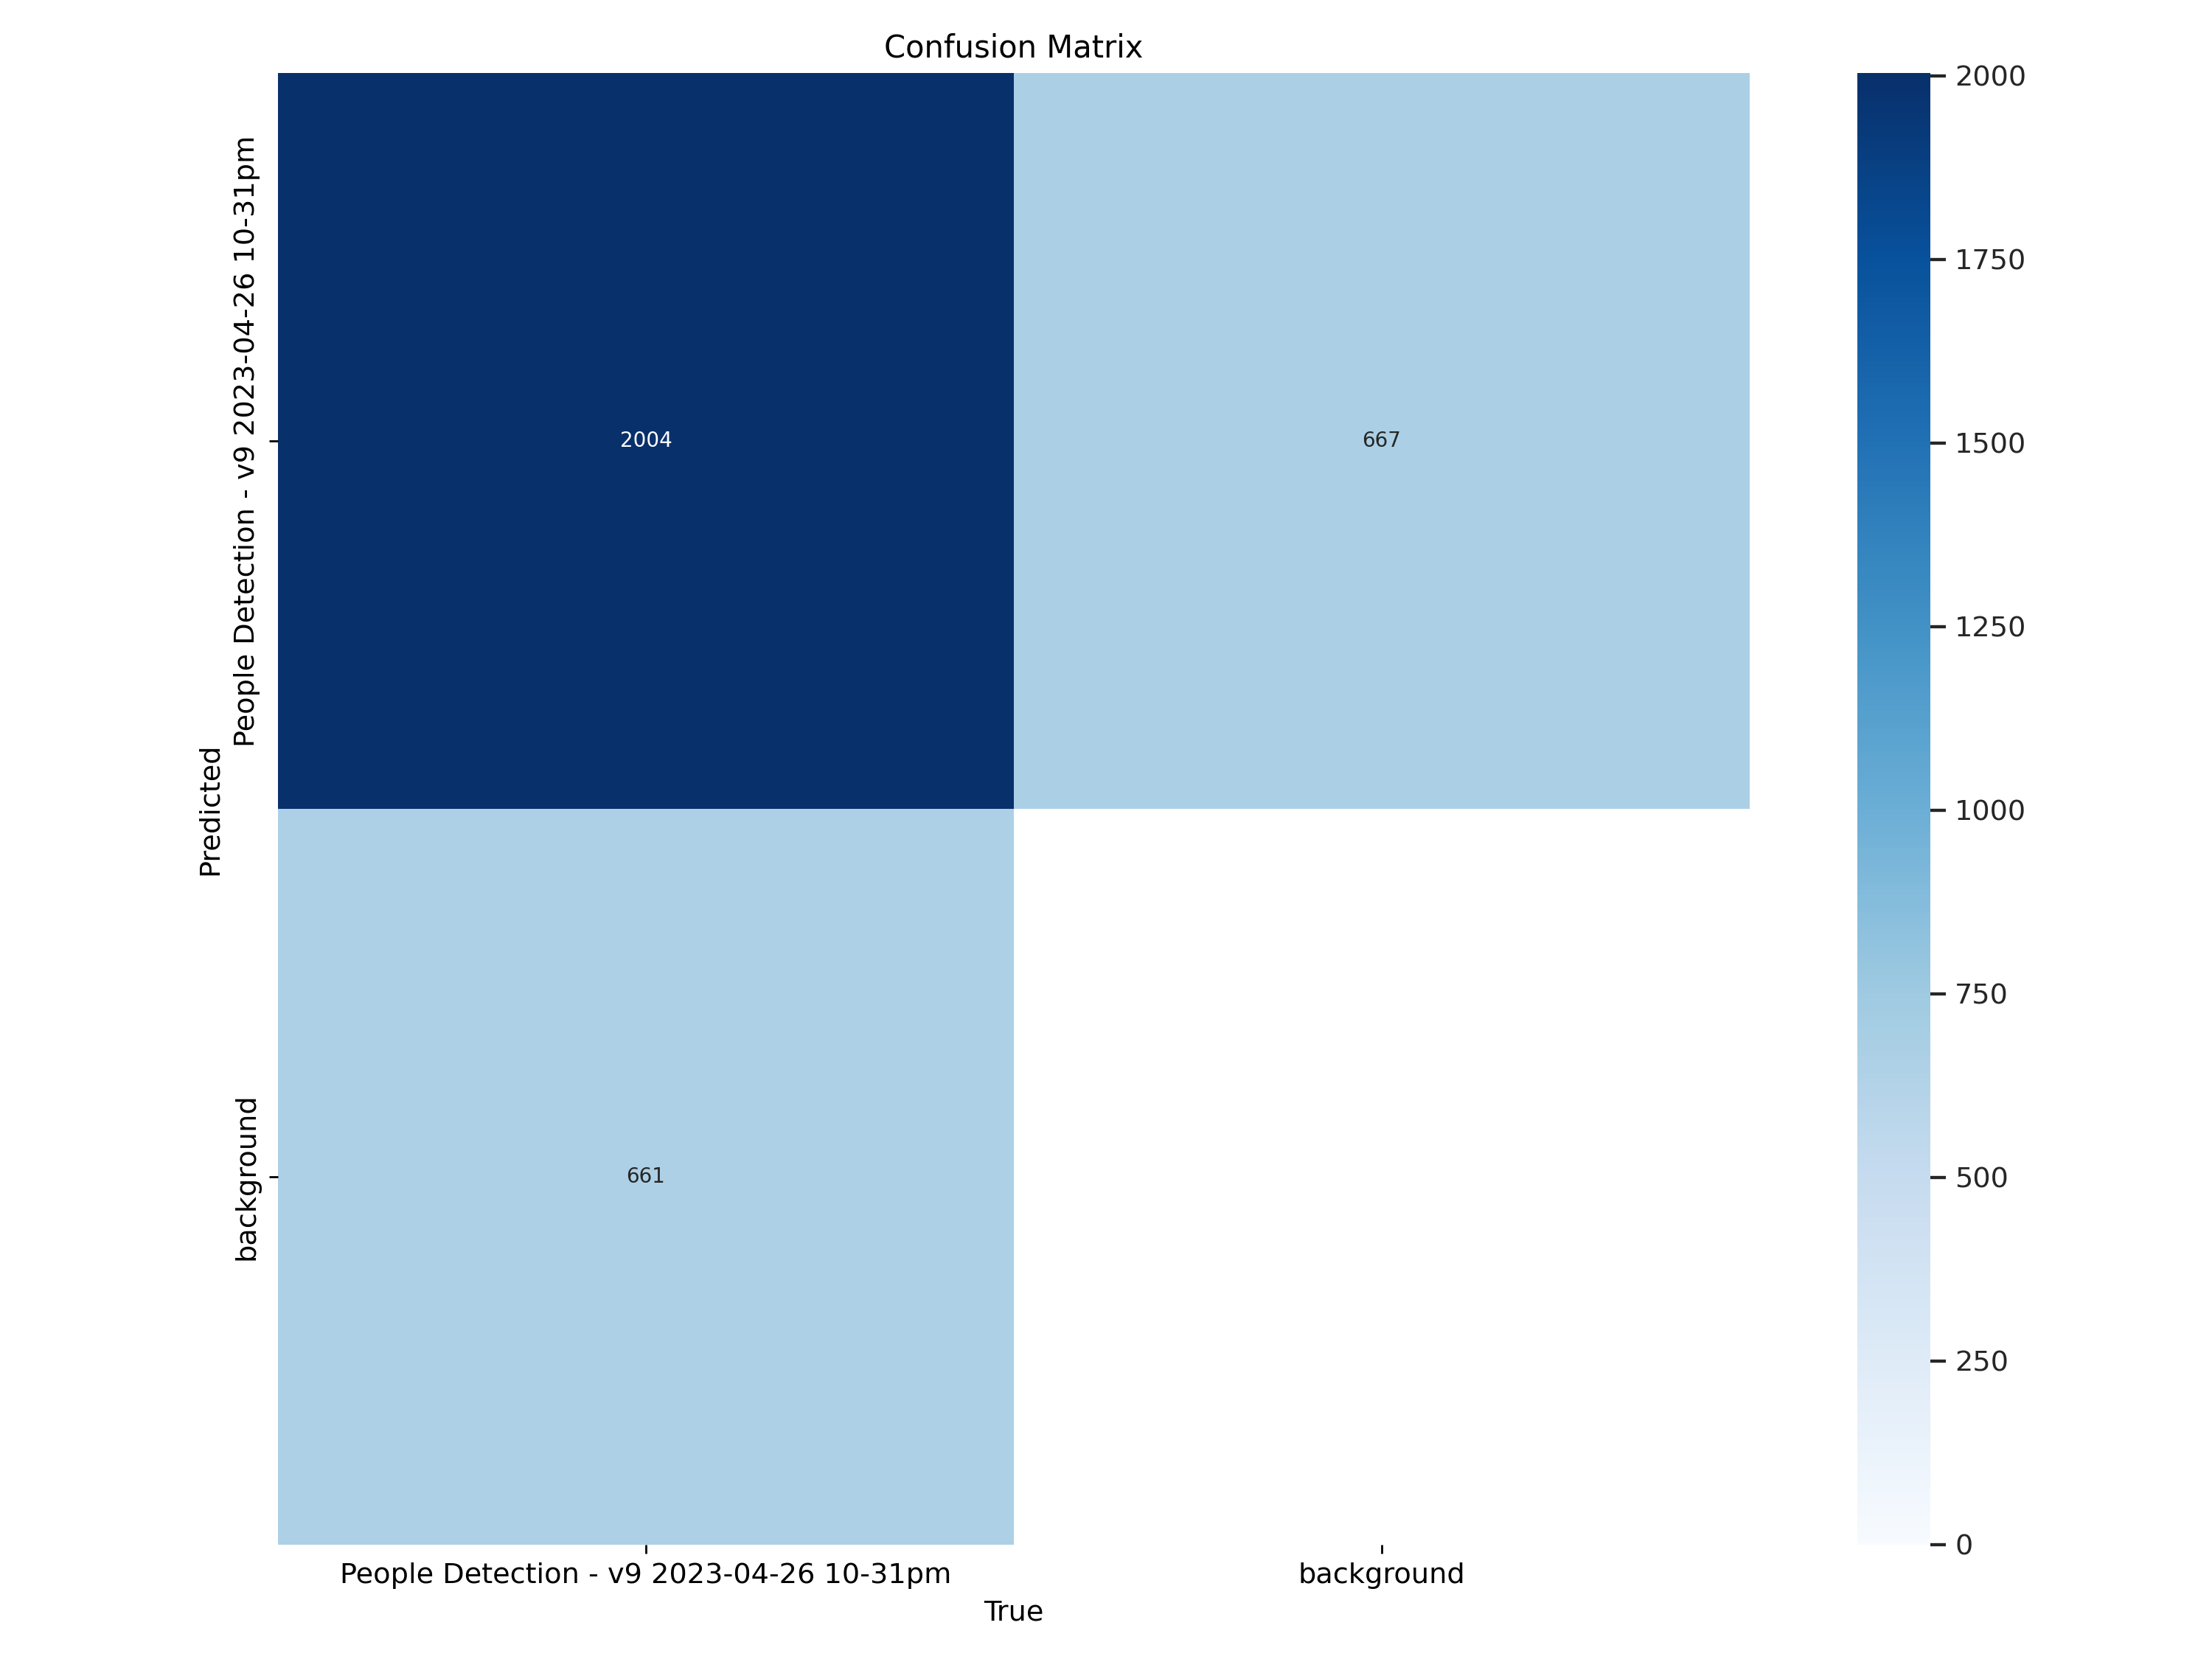

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

เช็คผล model ของเราในส่วน test dataset

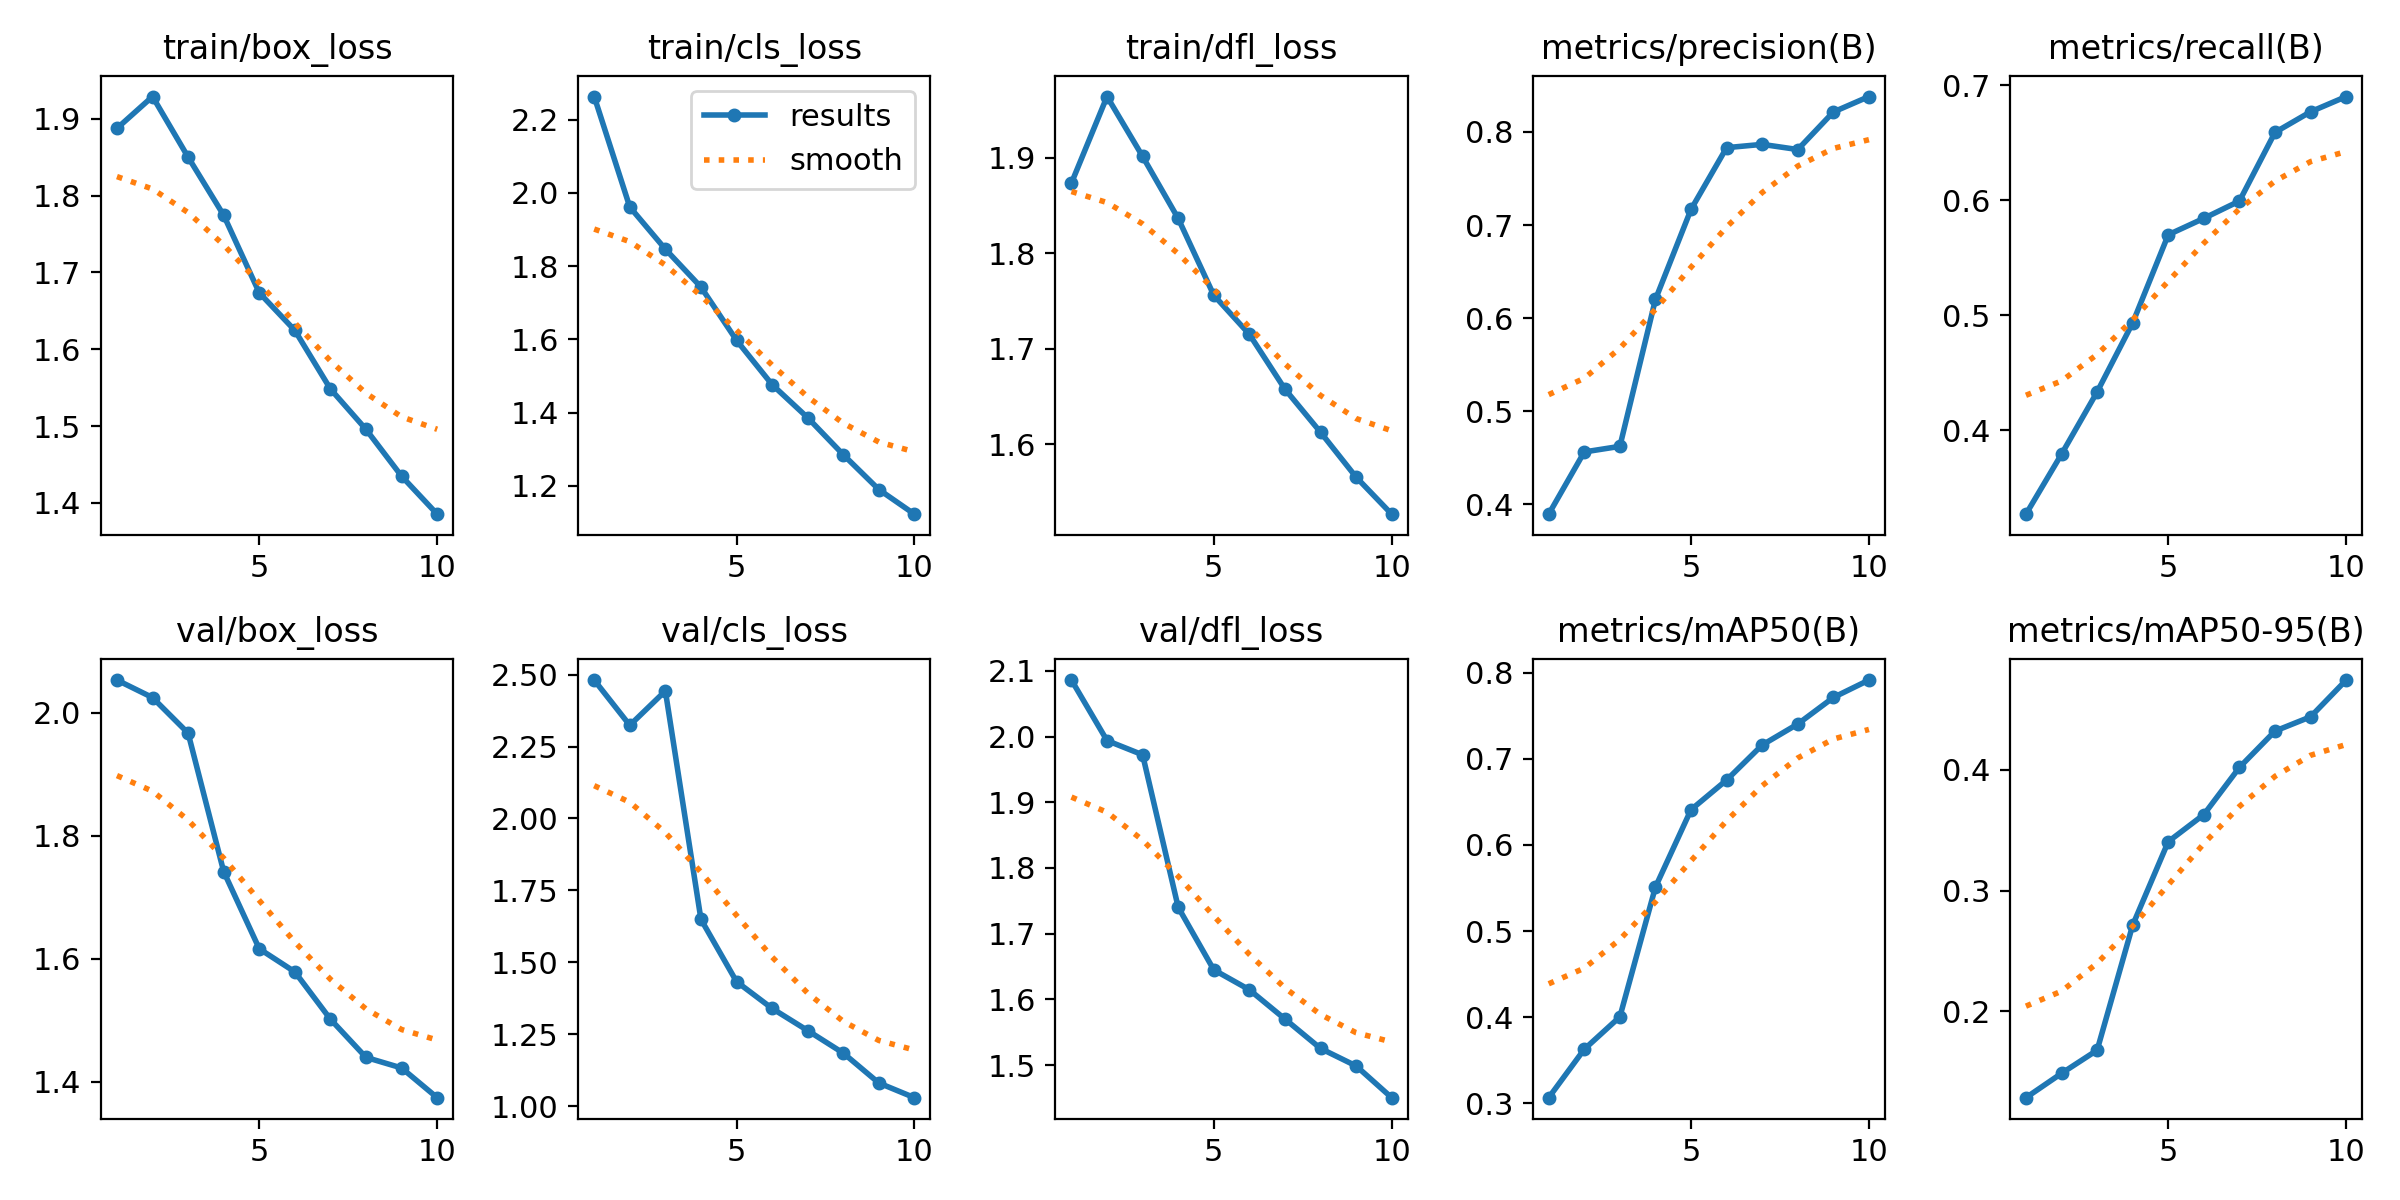

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/604 /content/datasets/person_detection_other-1/test/images/-_13_jpeg_jpg.rf.30594d24bbc2ff5d17d2963f4ecb4ade.jpg: 640x640 4 People Detection - v9 2023-04-26 10-31pms, 15.6ms
image 2/604 /content/datasets/person_detection_other-1/test/images/-_13_jpeg_jpg.rf.441330c9d4998ba274d9196f47c2735c.jpg: 640x640 4 People Detection - v9 2023-04-26 10-31pms, 15.6ms
image 3/604 /content/datasets/person_detection_other-1/test/images/-_13_jpeg_jpg.rf.f3babc21b7fdc8e0153b7444978eedda.jpg: 640x640 4 People Detection - v9 2023-04-26 10-31pms, 15.6ms
image 4/604 /content/datasets/person_detection_other-1/test/images/-_14_jpeg_jpg.rf.32063e5ab3d503a47dd54fe32d197186.jpg: 640x640 2 People Detection - v9 2023-04-26 10-31pms, 15.5ms
image 5/604 /content/datasets/person_detection_other-1/test/images/-_15_jpeg_jpg.rf.68025e039712d2befddc6

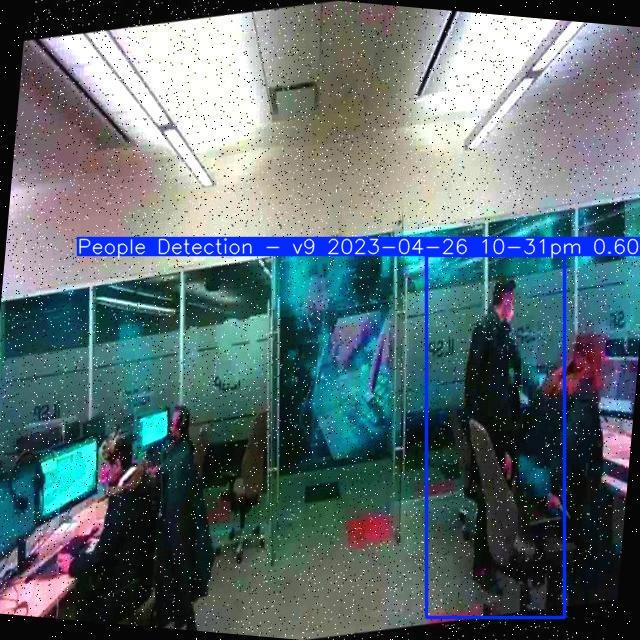

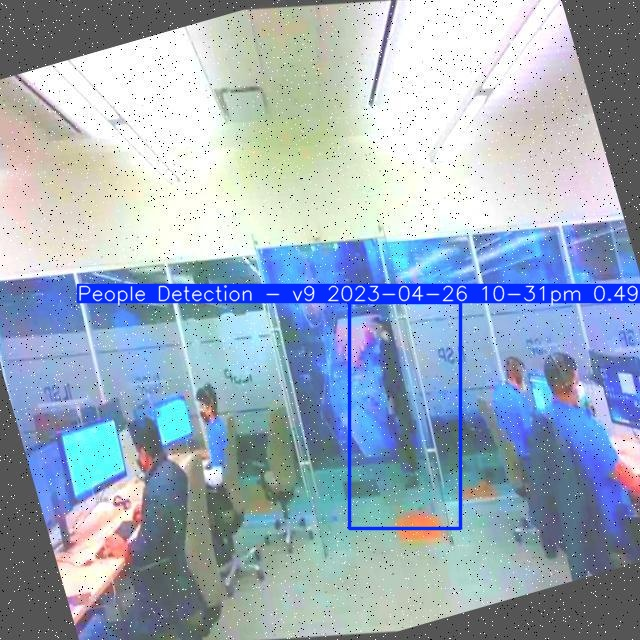

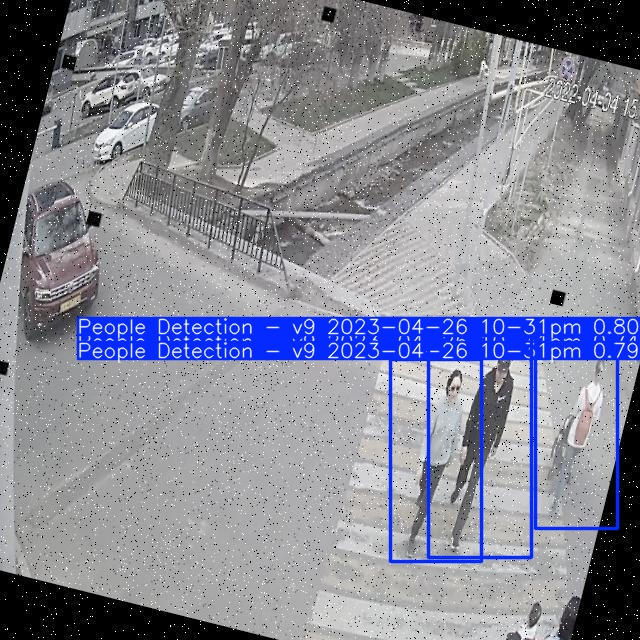

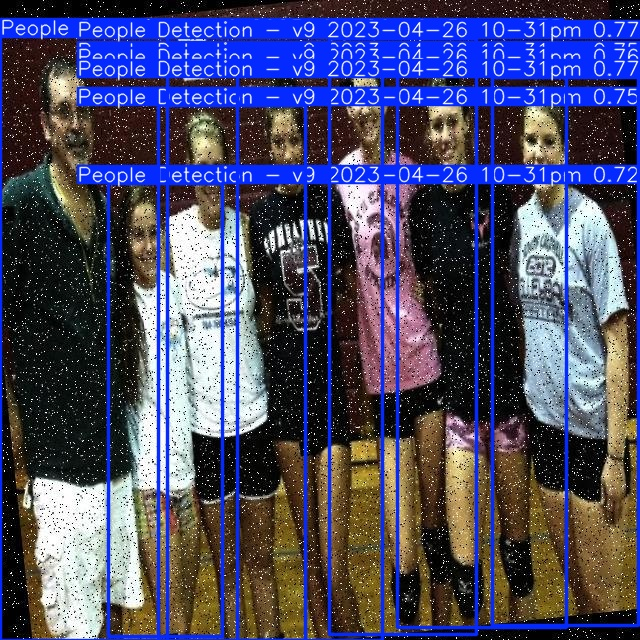

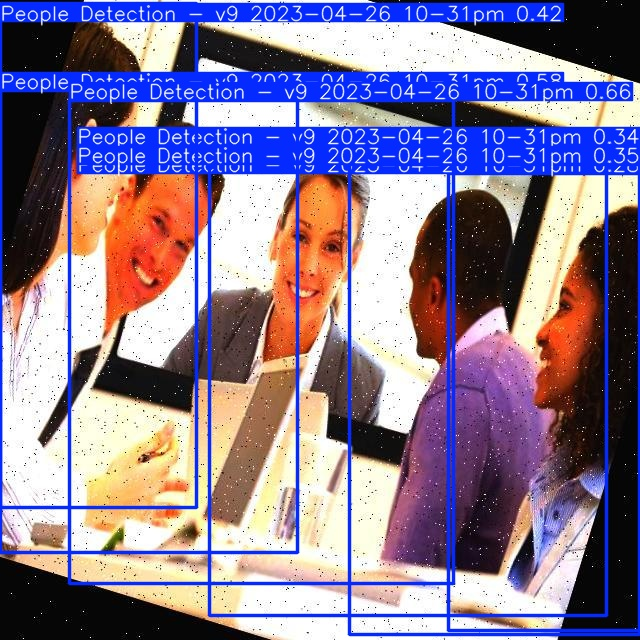

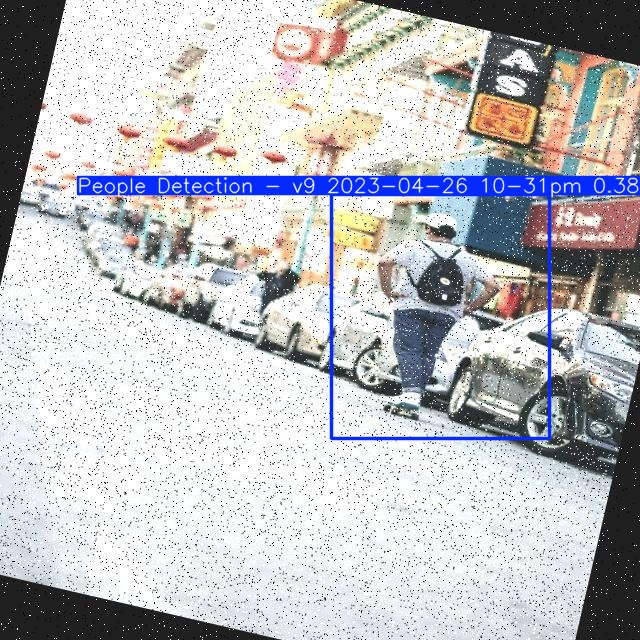

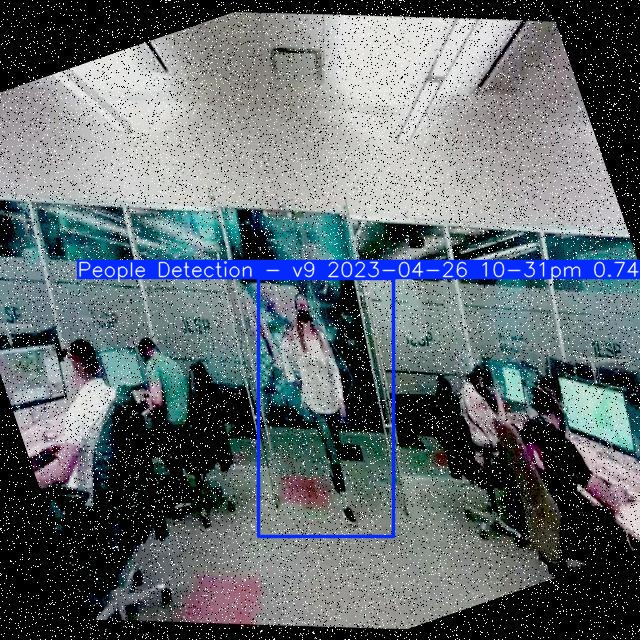

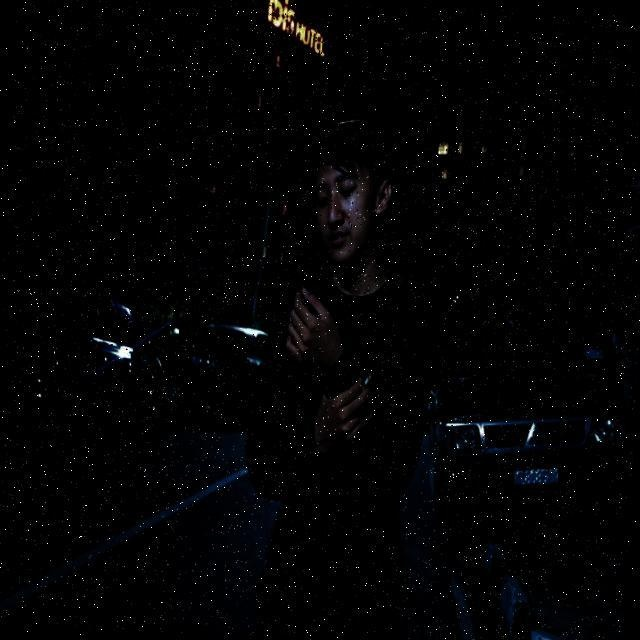

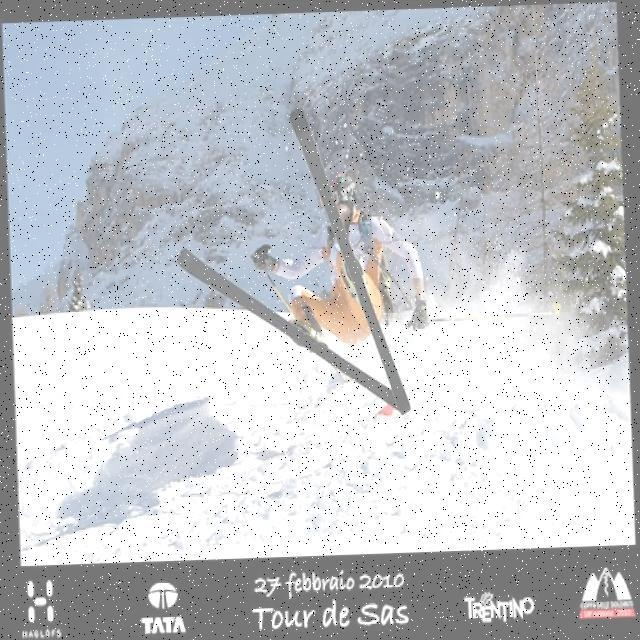

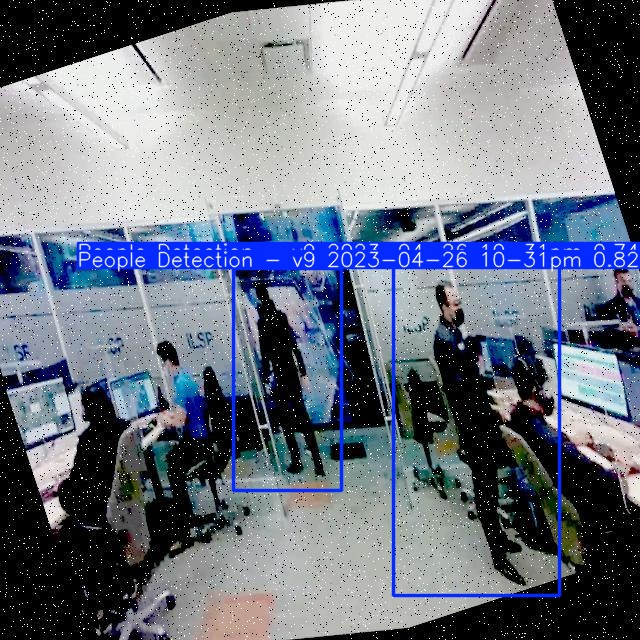

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")

ดาวโหลด model ลงบนคอมพิวเตอร์ของเรา

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>